<a href="https://colab.research.google.com/github/czyz-patryk/dataScienceBootcampExercises/blob/main/Copy_of_121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.21.6'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [6]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [7]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17,94.8500,95.5599,93.2100,94.3500,34284118
2023-02-16,95.3700,97.6800,94.7400,95.5100,42462618
2023-02-15,94.4900,97.1200,94.1500,96.9400,50298481
2023-02-14,94.4300,94.8450,92.2600,94.6800,54726120
2023-02-13,94.7400,95.2000,93.8400,94.6100,50076120
...,...,...,...,...,...
2018-02-26,56.5930,57.2000,56.4670,57.1850,30065900
2018-02-23,55.9330,56.4500,55.4220,56.4045,25261680
2018-02-22,55.9585,56.2730,55.2575,55.4950,27975540


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2023-02-17 to 2018-02-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [9]:
google.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1259.0,8.672677e+01,3.042393e+01,4.921600e+01,5.934925e+01,7.566350e+01,1.125950e+02,1.512500e+02
High,1259.0,8.770851e+01,3.071734e+01,5.060600e+01,5.995450e+01,7.635350e+01,1.140070e+02,1.515470e+02
Low,1259.0,8.575138e+01,3.006773e+01,4.888300e+01,5.868875e+01,7.503600e+01,1.114255e+02,1.488990e+02
Close,1259.0,8.674861e+01,3.038793e+01,4.923350e+01,5.948475e+01,7.578800e+01,1.126735e+02,1.498380e+02
Volume,1259.0,3.530539e+07,1.593394e+07,9.312760e+06,2.516669e+07,3.144428e+07,4.035117e+07,1.331771e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [10]:
pd.set_option("display.precision", 2)

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [11]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1259.00,1259.00,1259.00,1259.00,1259.00
mean,86.73,87.71,85.75,86.75,35305388.64
std,30.42,30.72,30.07,30.39,15933937.72
min,49.22,50.61,48.88,49.23,9312760.00
25%,59.35,59.95,58.69,59.48,25166690.00
50%,75.66,76.35,75.04,75.79,31444280.00
75%,112.59,114.01,111.43,112.67,40351170.00
max,151.25,151.55,148.90,149.84,133177100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

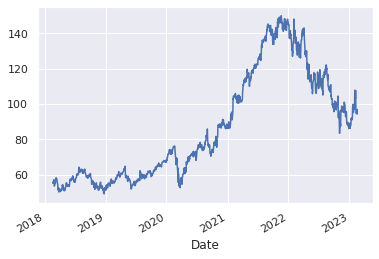

In [12]:
_ = google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [13]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2023-02-17,94.85,95.56,93.21,94.35,34284118
1,2023-02-16,95.37,97.68,94.74,95.51,42462618
2,2023-02-15,94.49,97.12,94.15,96.94,50298481
3,2023-02-14,94.43,94.84,92.26,94.68,54726120
4,2023-02-13,94.74,95.20,93.84,94.61,50076120
...,...,...,...,...,...,...
1254,2018-02-26,56.59,57.20,56.47,57.19,30065900
1255,2018-02-23,55.93,56.45,55.42,56.40,25261680
1256,2018-02-22,55.96,56.27,55.26,55.49,27975540
1257,2018-02-21,55.45,56.81,55.38,55.69,41438940


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [16]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2023-02-17,94.85,95.56,93.21,94.35,34284118,2,2023
1,2023-02-16,95.37,97.68,94.74,95.51,42462618,2,2023
2,2023-02-15,94.49,97.12,94.15,96.94,50298481,2,2023
3,2023-02-14,94.43,94.84,92.26,94.68,54726120,2,2023
4,2023-02-13,94.74,95.20,93.84,94.61,50076120,2,2023
...,...,...,...,...,...,...,...,...
1254,2018-02-26,56.59,57.20,56.47,57.19,30065900,2,2018
1255,2018-02-23,55.93,56.45,55.42,56.40,25261680,2,2018
1256,2018-02-22,55.96,56.27,55.26,55.49,27975540,2,2018
1257,2018-02-21,55.45,56.81,55.38,55.69,41438940,2,2018


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [20]:
google.groupby('Year')['Close'].mean()

Year
2018    56.14
2019    59.56
2020    73.95
2021   124.22
2022   114.76
2023    95.43
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

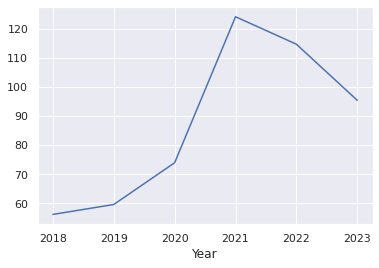

In [22]:
_ = google.groupby('Year')['Close'].mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [23]:
google.groupby('Month')['Close'].mean()

Month
1    88.45
2    90.49
3    83.23
4    82.93
5    81.15
6    83.85
7    86.31
8    90.70
9    88.91
10   85.65
11   89.51
12   90.29
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

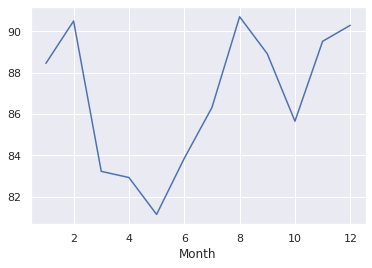

In [24]:
google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [25]:
google.groupby(['Year', 'Month']).mean()

Open   High   Low  Close      Volume
Year Month                                      
2018 2     55.98  56.59 55.43  55.86 35819845.71
     3     54.89  55.55 53.95  54.69 49634858.10
     4     52.08  52.72 51.41  52.00 46856317.14
     5     53.53  54.11 53.18  53.74 33669584.55
     6     57.42  57.94 56.95  57.47 38271052.38
...          ...    ...   ...    ...         ...
2022 10    98.55 100.33 97.41  98.88 32459671.86
     11    93.94  95.37 92.46  93.91 34120840.43
     12    92.67  93.71 91.37  92.32 28700812.43
2023 1     92.49  93.96 91.49  93.04 33644877.10
     2     98.80 100.75 97.30  99.12 57904662.08

[61 rows x 5 columns]

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [42]:
google['Close'].argmax()

313

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [45]:
google.iloc[[313]]

,Date,Open,High,Low,Close,Volume,Month,Year
313,2021-11-18,148.24,150.58,147.88,149.84,35628220,11,2021


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [52]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2023-02-17,94.85,94.35,34284118
1,2023-02-16,95.37,95.51,42462618
2,2023-02-15,94.49,96.94,50298481
3,2023-02-14,94.43,94.68,54726120
4,2023-02-13,94.74,94.61,50076120
...,...,...,...,...
1254,2018-02-26,56.59,57.19,30065900
1255,2018-02-23,55.93,56.40,25261680
1256,2018-02-22,55.96,55.49,27975540
1257,2018-02-21,55.45,55.69,41438940


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [55]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2023-02-17,94.85,95.56,93.21,94.35,34284118,2,2023
2023-02-16,95.37,97.68,94.74,95.51,42462618,2,2023
2023-02-15,94.49,97.12,94.15,96.94,50298481,2,2023
2023-02-14,94.43,94.84,92.26,94.68,54726120,2,2023
2023-02-13,94.74,95.20,93.84,94.61,50076120,2,2023
...,...,...,...,...,...,...,...
2018-02-26,56.59,57.20,56.47,57.19,30065900,2,2018
2018-02-23,55.93,56.45,55.42,56.40,25261680,2,2018
2018-02-22,55.96,56.27,55.26,55.49,27975540,2,2018


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [58]:
google = google.drop(['Year', 'Month'], axis=1)
google

KeyError: ignored

### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [59]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2023-02-17,94.85,95.56,93.21,94.35,34284118
2023-02-16,95.37,97.68,94.74,95.51,42462618
2023-02-15,94.49,97.12,94.15,96.94,50298481
2023-02-14,94.43,94.84,92.26,94.68,54726120
2023-02-13,94.74,95.20,93.84,94.61,50076120
...,...,...,...,...,...
2018-02-26,56.59,57.20,56.47,57.19,30065900
2018-02-23,55.93,56.45,55.42,56.40,25261680
2018-02-22,55.96,56.27,55.26,55.49,27975540
